# Carregamento do Dataset e Pré-Processamento Necessário

In [1]:
import pandas as pd
# Lendo o arquivo XLS
df_IBM = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.xls')

proporcoes = df_IBM['Churn'].value_counts(normalize=True) * 100
print(proporcoes)

df_IBM['InternetService'] = df_IBM['InternetService'].replace('No internet service', 'No')
df_IBM['MultipleLines'] = df_IBM['MultipleLines'].replace('No phone service', 'No')
df_IBM['OnlineSecurity'] = df_IBM['OnlineSecurity'].replace('No internet service', 'No')
df_IBM['OnlineBackup'] = df_IBM['OnlineBackup'].replace('No internet service', 'No')
df_IBM['DeviceProtection'] = df_IBM['DeviceProtection'].replace('No internet service', 'No')
df_IBM['TechSupport'] = df_IBM['TechSupport'].replace('No internet service', 'No')
df_IBM['StreamingTV'] = df_IBM['StreamingTV'].replace('No internet service', 'No')
df_IBM['StreamingMovies'] = df_IBM['StreamingMovies'].replace('No internet service', 'No')
df_IBM['TotalCharges'] = pd.to_numeric(df_IBM['TotalCharges'], errors='coerce')

#Remoção do atributo CustomerID por não adicionar informação
df_IBM = df_IBM.drop('customerID', axis=1)

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


# Análise descritiva dos dados

## Estudo da Coluna de Clientes Seniores (SeniorCitizen) (Nominal)

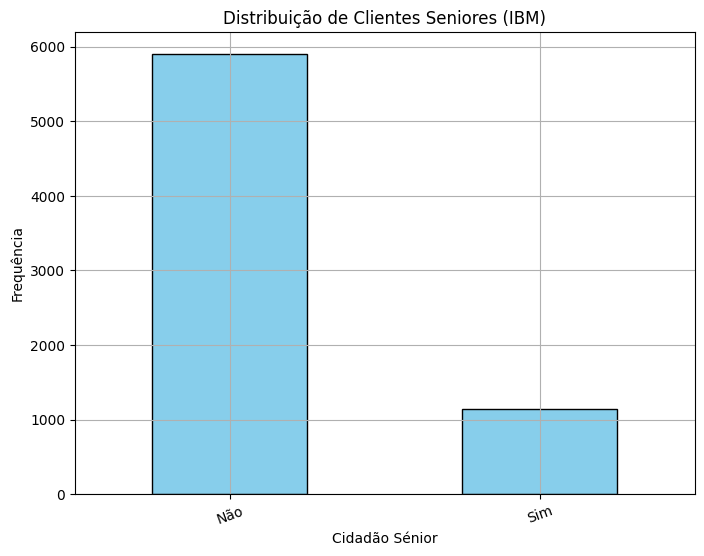

In [2]:
import matplotlib.pyplot as plt
plt.style.use('default')

churn_counts = df_IBM['SeniorCitizen'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Clientes Seniores (IBM)')
plt.xlabel('Cidadão Sénior')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

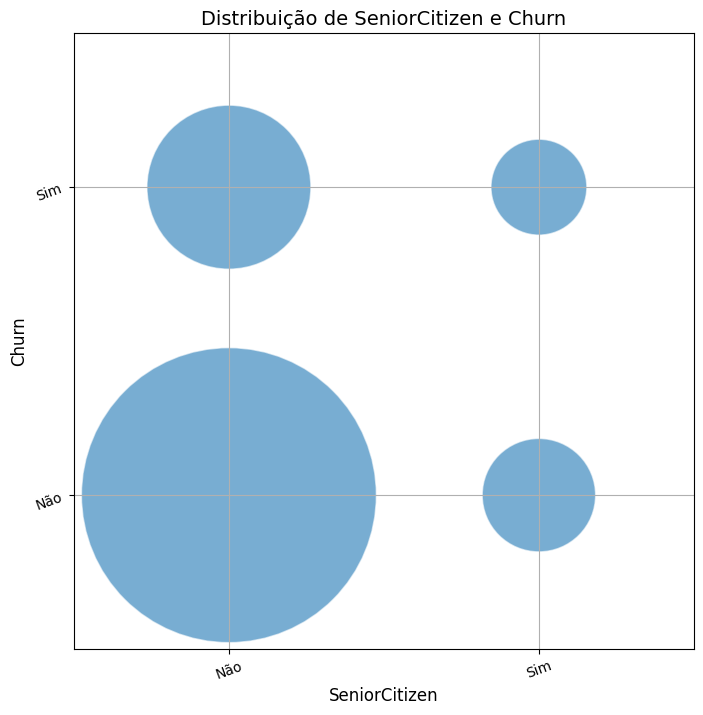

In [3]:
import matplotlib.pyplot as plt

# Contar as combinações de SeniorCitizen e Churn_Yes
senior_churn_counts = df_IBM.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='Count')

# Criar o gráfico de bolhas corrigido
plt.figure(figsize=(8, 8))
plt.scatter(
    x=senior_churn_counts['SeniorCitizen'], 
    y=senior_churn_counts['Churn'],
    s=senior_churn_counts['Count'] * 10,  # Tamanho da bolha proporcional à contagem
    alpha=0.6,
    edgecolors='w'
)

# Ajuste dos limites do gráfico
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)

# Adicionar rótulos e título
plt.title('Distribuição de SeniorCitizen e Churn', fontsize=14)
plt.xlabel('SeniorCitizen', fontsize=12)
plt.ylabel('Churn', fontsize=12)

# Adicionar grades e rótulos personalizados
plt.grid(True)
plt.xticks([0, 1], ['Não', 'Sim'], fontsize=10)
plt.yticks([0, 1], ['Não', 'Sim'], fontsize=10)

plt.xticks(rotation=20)
plt.yticks(rotation=20)
# Mostrar o gráfico
plt.show()


## Estudo da Coluna Genero (Gender) (Nominal)

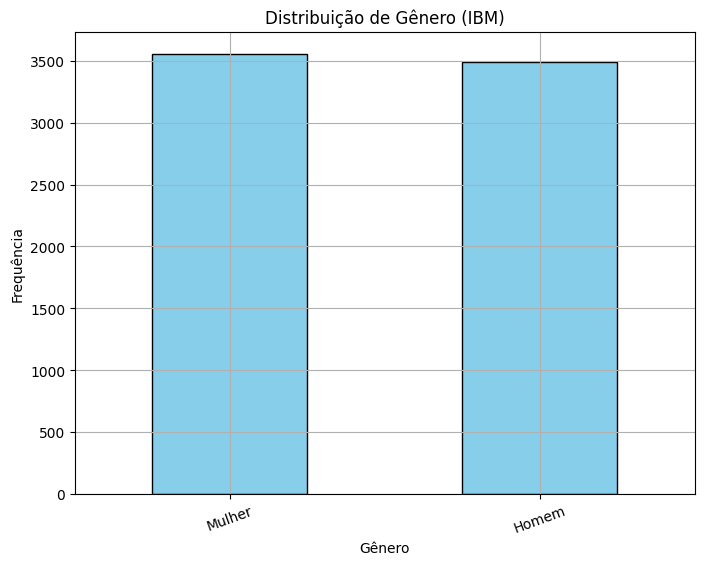

In [4]:
import matplotlib.pyplot as plt

gender_counts = df_IBM['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Gênero (IBM)')
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Mulher', 'Homem'])
plt.show()

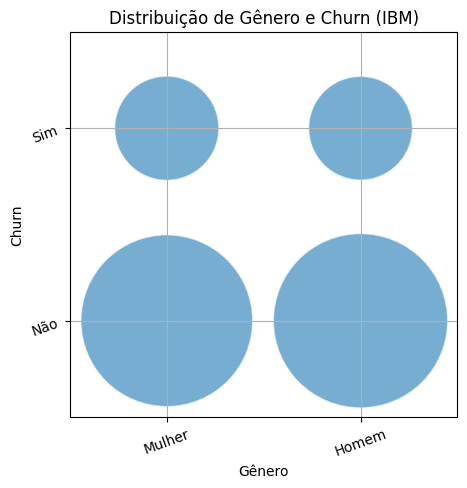

In [5]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de gênero e churn
gender_churn_counts = df_IBM.groupby(['gender', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(5, 5))
plt.scatter(
    x=gender_churn_counts['gender'], 
    y=gender_churn_counts['Churn'],
    s=gender_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
# Ajuste dos limites
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Gênero e Churn (IBM)')
plt.xlabel('Gênero')
plt.ylabel('Churn')
plt.grid(True)
plt.xticks(rotation=20)
plt.yticks(rotation=20)
plt.yticks([0, 1], ['Não', 'Sim'])
plt.xticks([0, 1], ['Mulher', 'Homem'])
plt.show()

## Estudo da Coluna Duração da posse (Tenure) (Racio)

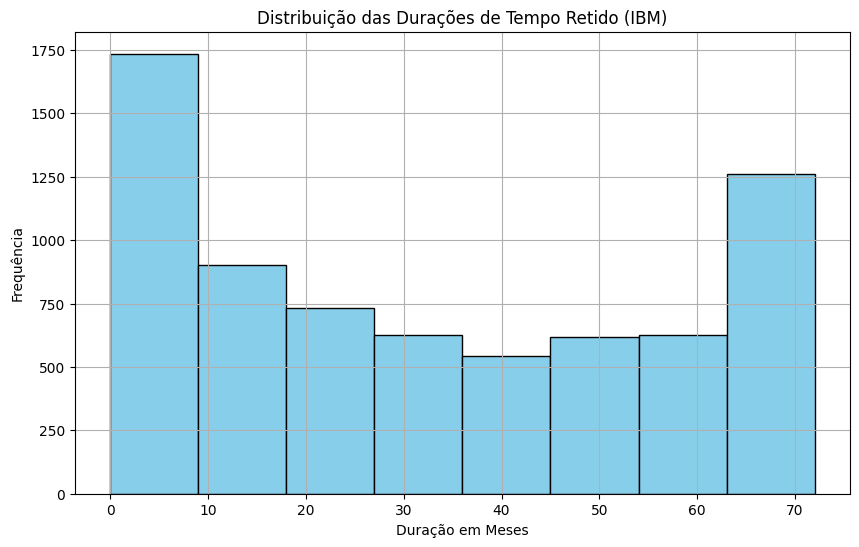

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_IBM['tenure'], bins=8, color='skyblue', edgecolor='black')
plt.title('Distribuição das Durações de Tempo Retido (IBM)')
plt.xlabel('Duração em Meses')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

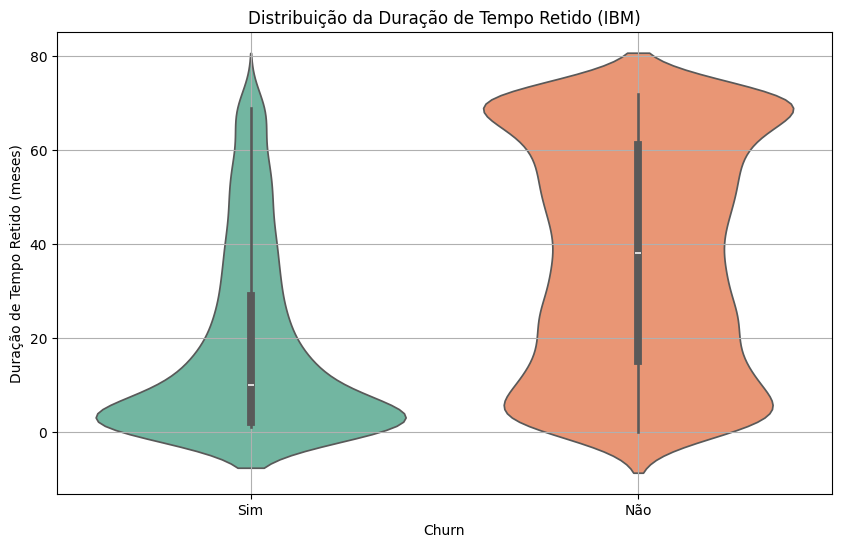

In [7]:
# nominal X racio
import seaborn as sns
import matplotlib.pyplot as plt

# Definir as cores
palette = sns.color_palette("Set2")
color1 = palette[1]
color2 = palette[0]
custom_palette = {'Yes': color2, 'No': color1}

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='tenure', data=df_IBM, palette=custom_palette,hue="Churn",legend=False, order=['Yes', 'No'])
plt.title('Distribuição da Duração de Tempo Retido (IBM)')
plt.xlabel('Churn')
plt.ylabel('Duração de Tempo Retido (meses)')
plt.grid(True)
plt.xticks([0, 1], ['Sim', 'Não'])
plt.show()

## Estudo da Coluna Cobrança Mensal (MonthlyCharges) (Racio)

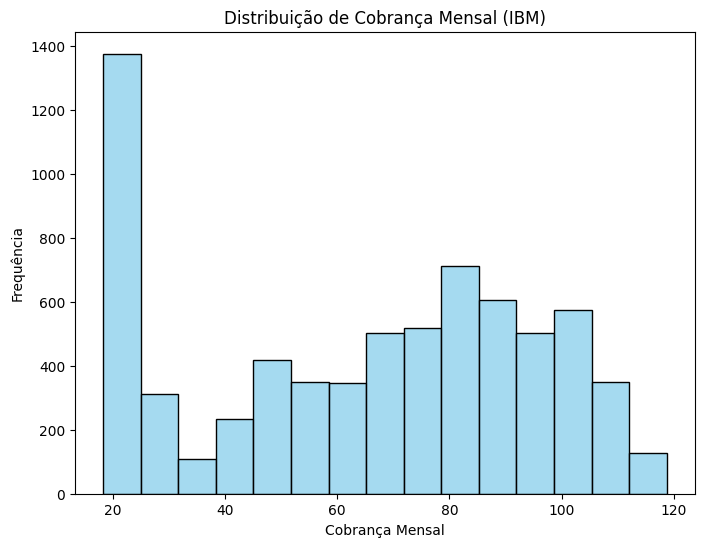

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(data=df_IBM, x='MonthlyCharges', bins=15, color='skyblue', edgecolor='black')
plt.title('Distribuição de Cobrança Mensal (IBM)')
plt.xlabel('Cobrança Mensal')
plt.ylabel('Frequência')
plt.show()

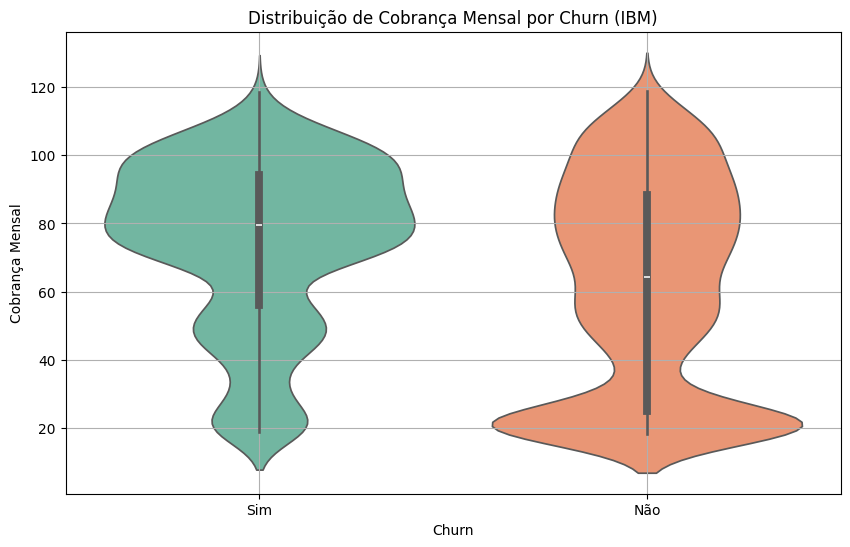

In [9]:
# nominal x racio
import seaborn as sns
import matplotlib.pyplot as plt

# Definir as cores
palette = sns.color_palette("Set2")
color1 = palette[1]
color2 = palette[0]
custom_palette = {'Yes': color2, 'No': color1}

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df_IBM, palette=custom_palette, hue="Churn", legend=False, order=['Yes', 'No'])
plt.title('Distribuição de Cobrança Mensal por Churn (IBM)')
plt.xlabel('Churn')
plt.ylabel('Cobrança Mensal')
plt.grid(True)
plt.xticks([0, 1], ['Sim', 'Não'])
plt.show()

## Estudo da Coluna do tipo de contrato (ContratType) (Nominal)

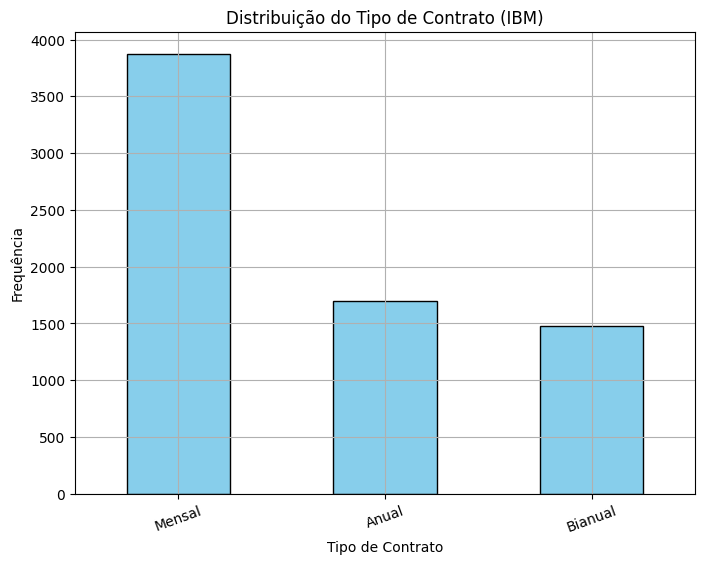

In [10]:
import matplotlib.pyplot as plt

contract_counts = df_IBM['Contract'].value_counts()

plt.figure(figsize=(8, 6))
contract_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição do Tipo de Contrato (IBM)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1, 2], ['Mensal', 'Anual', 'Bianual'])
plt.show()

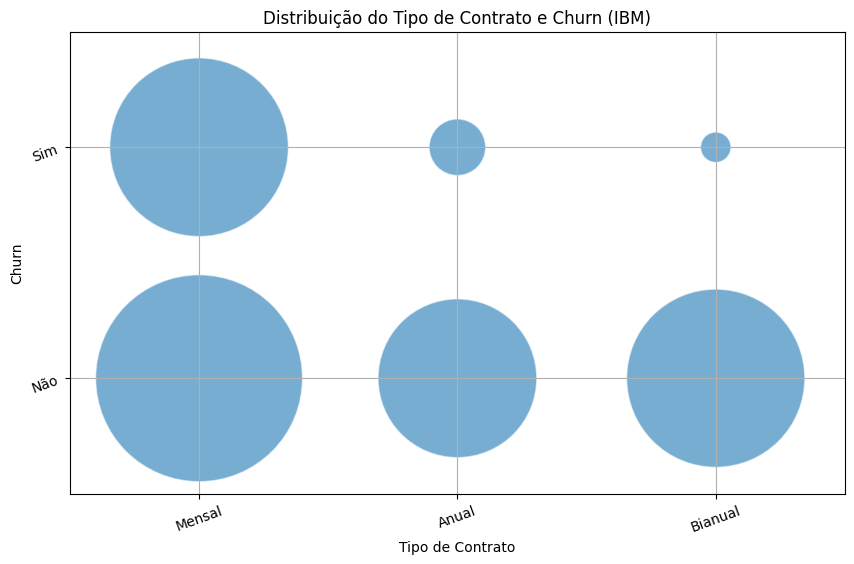

In [11]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Tipo de Contrato e Churn
contract_churn_counts = df_IBM.groupby(['Contract', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(10, 6))
plt.scatter(
    x=contract_churn_counts['Contract'], 
    y=contract_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=contract_churn_counts['Count'] * 10,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 2.5)
plt.title('Distribuição do Tipo de Contrato e Churn (IBM)')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Churn')
plt.xticks(rotation=20)
plt.yticks(rotation=20)
plt.xticks([0, 1, 2], ['Mensal', 'Anual', 'Bianual'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna Tipo de servico de internet contratado (Churn) (Nominal)

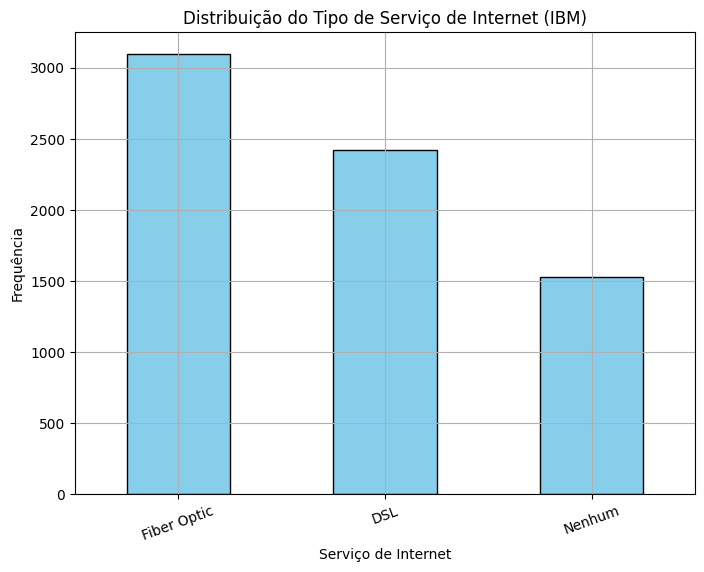

In [12]:
import matplotlib.pyplot as plt

#Substituir os valores NaN por "Nenhum"

gender_counts = df_IBM['InternetService'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição do Tipo de Serviço de Internet (IBM)')
plt.xlabel('Serviço de Internet')
plt.ylabel('Frequência')
plt.xticks([0, 1, 2], ['Fiber Optic', 'DSL', 'Nenhum'])
plt.xticks(rotation=20)
plt.show()

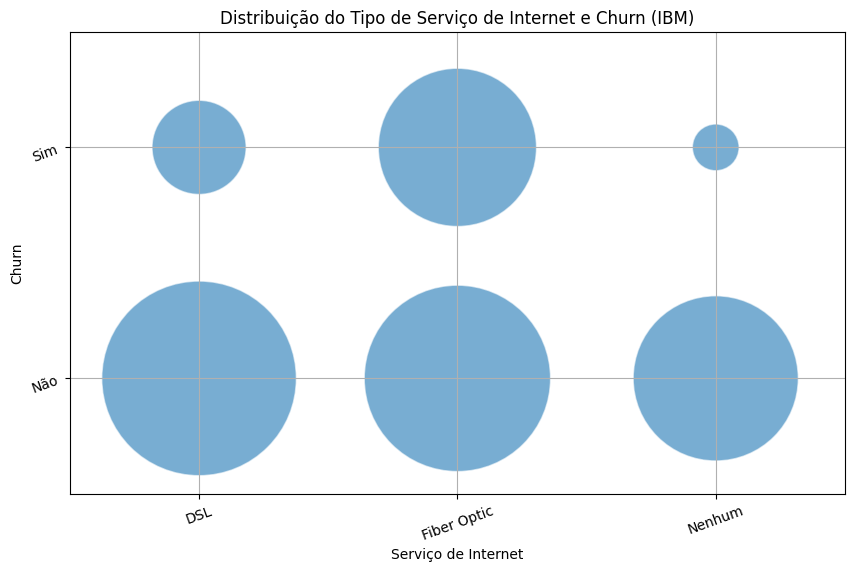

In [13]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Serviço de Internet e Churn
internet_churn_counts = df_IBM.groupby(['InternetService', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(10, 6))
plt.scatter(
    x=internet_churn_counts['InternetService'], 
    y=internet_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=internet_churn_counts['Count'] * 10,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 2.5)
plt.title('Distribuição do Tipo de Serviço de Internet e Churn (IBM)')
plt.xlabel('Serviço de Internet')
plt.ylabel('Churn')
plt.xticks(rotation=20)
plt.yticks(rotation=20)
plt.xticks([0, 1, 2], ['DSL', 'Fiber Optic', 'Nenhum'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Cobrança total (TotalCharges) (Racio)

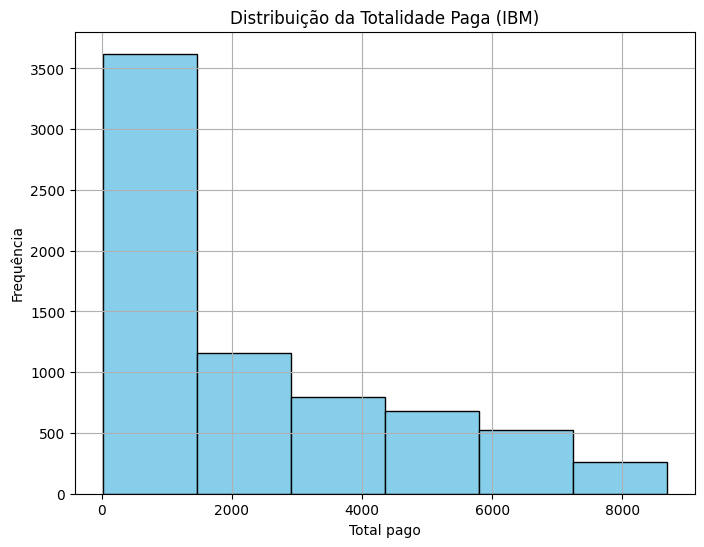

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df_IBM['TotalCharges'], bins=6, color='skyblue', edgecolor='black')
plt.title('Distribuição da Totalidade Paga (IBM)')
plt.xlabel('Total pago')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

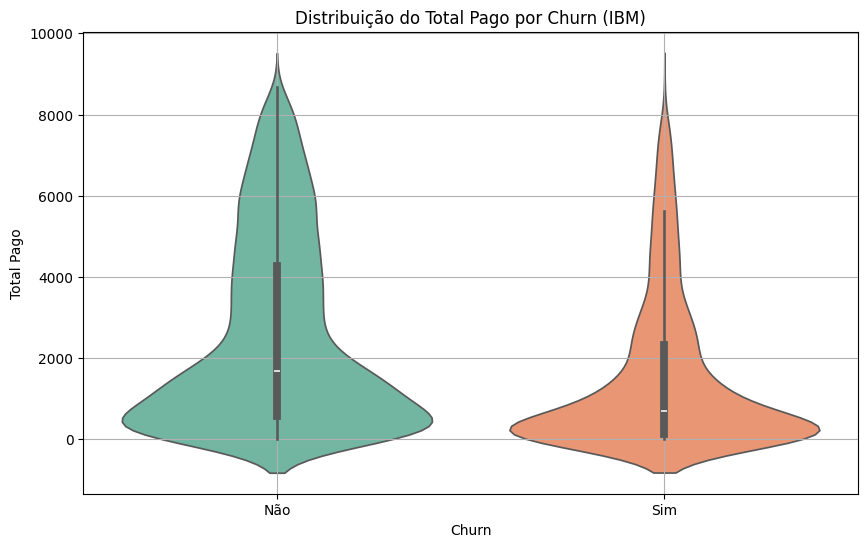

In [15]:
# nominal x racio
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='TotalCharges', data=df_IBM, palette="Set2", hue="Churn", legend=False)
plt.title('Distribuição do Total Pago por Churn (IBM)')
plt.xlabel('Churn')
plt.ylabel('Total Pago')
plt.grid(True)

plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()


## Estudo da Coluna de Suporte Técnico (TechSupport) (Nominal)

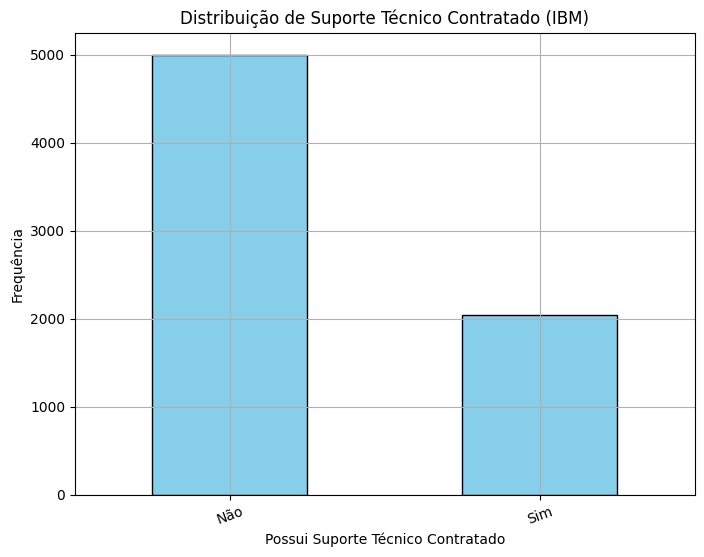

In [16]:
import matplotlib.pyplot as plt

techSupport_counts = df_IBM['TechSupport'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
techSupport_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Suporte Técnico Contratado (IBM)')
plt.xlabel('Possui Suporte Técnico Contratado')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

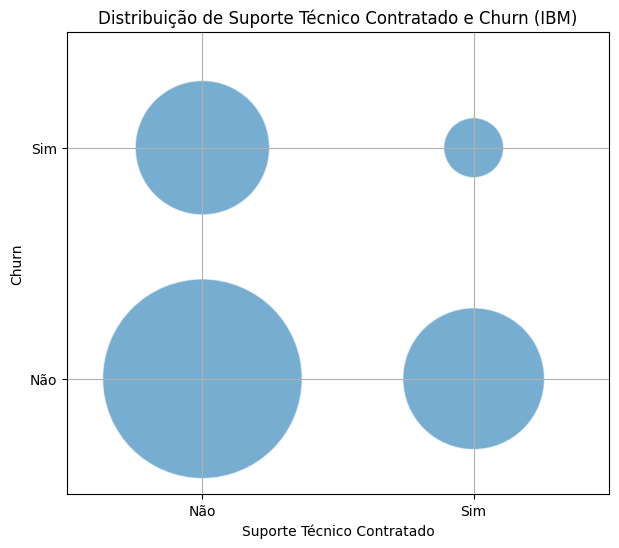

In [17]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
techSupport_churn_counts = df_IBM.groupby(['TechSupport', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=techSupport_churn_counts['TechSupport'], 
    y=techSupport_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=techSupport_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Suporte Técnico Contratado e Churn (IBM)')
plt.xlabel('Suporte Técnico Contratado')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Abandono do Serviço (Churn) (Nominal)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


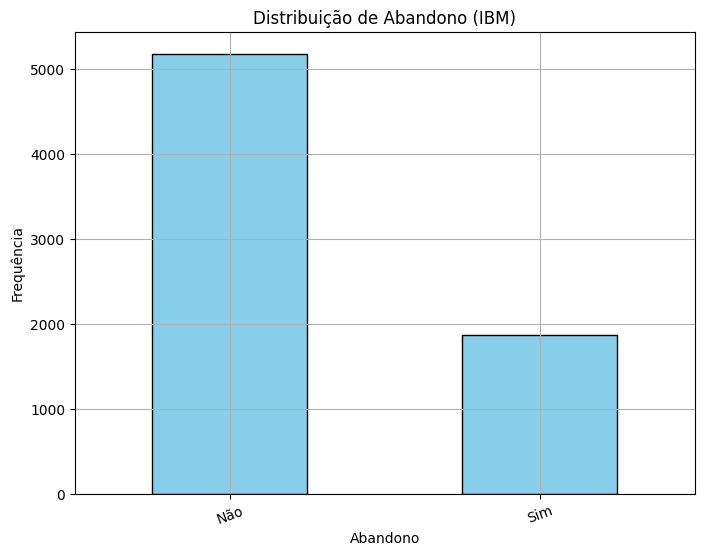

In [18]:
import matplotlib.pyplot as plt

churn_counts = df_IBM['Churn'].value_counts()
print(churn_counts.head())

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Abandono (IBM)')
plt.xlabel('Abandono')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

## Estudo da Coluna de Posse de um Parceiro (Partner) (Nominal)

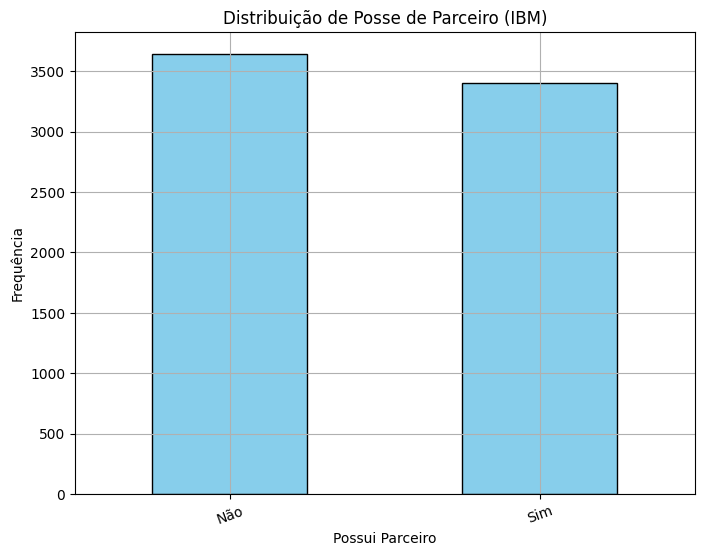

In [19]:
import matplotlib.pyplot as plt

partner_counts = df_IBM['Partner'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
partner_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de Parceiro (IBM)')
plt.xlabel('Possui Parceiro')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

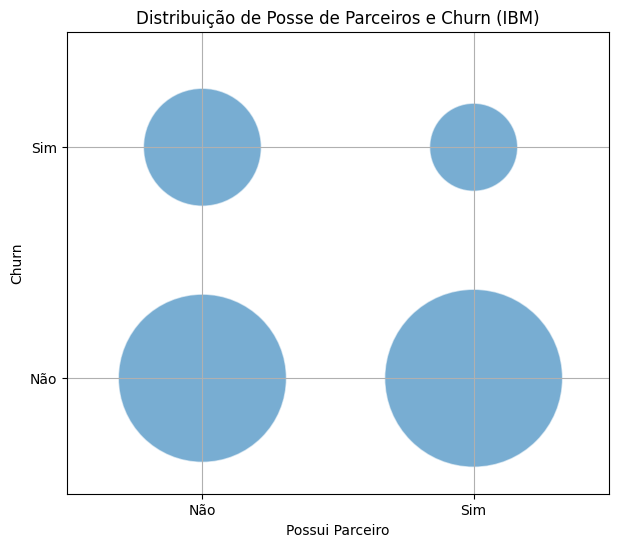

In [20]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
partner_churn_counts = df_IBM.groupby(['Partner', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=partner_churn_counts['Partner'], 
    y=partner_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=partner_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Parceiros e Churn (IBM)')
plt.xlabel('Possui Parceiro')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Posse de Dependentes (Dependents) (Nominal)

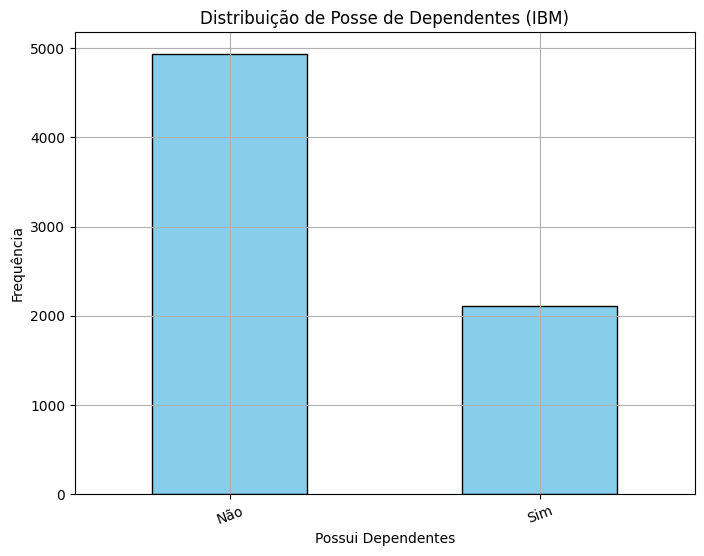

In [21]:
import matplotlib.pyplot as plt

dependents_counts = df_IBM['Dependents'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
dependents_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de Dependentes (IBM)')
plt.xlabel('Possui Dependentes')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

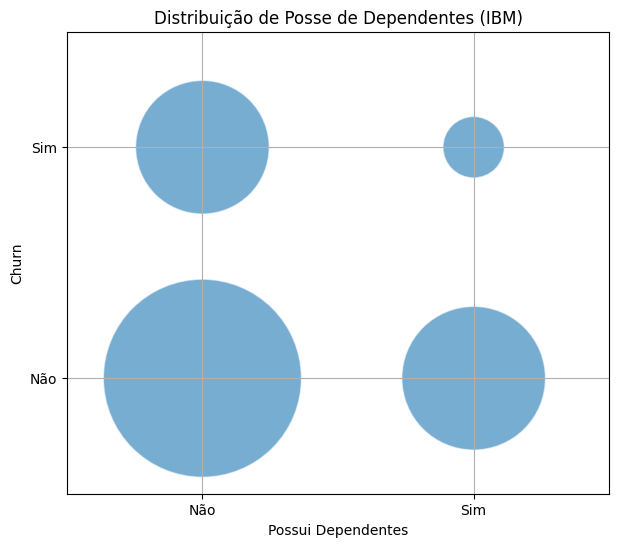

In [22]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
dependents_churn_counts = df_IBM.groupby(['Dependents', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=dependents_churn_counts['Dependents'], 
    y=dependents_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=dependents_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Dependentes (IBM)')
plt.xlabel('Possui Dependentes')
plt.ylabel('Churn')

plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Posse de um Serviço de Telefone (PhoneService) (Nominal)

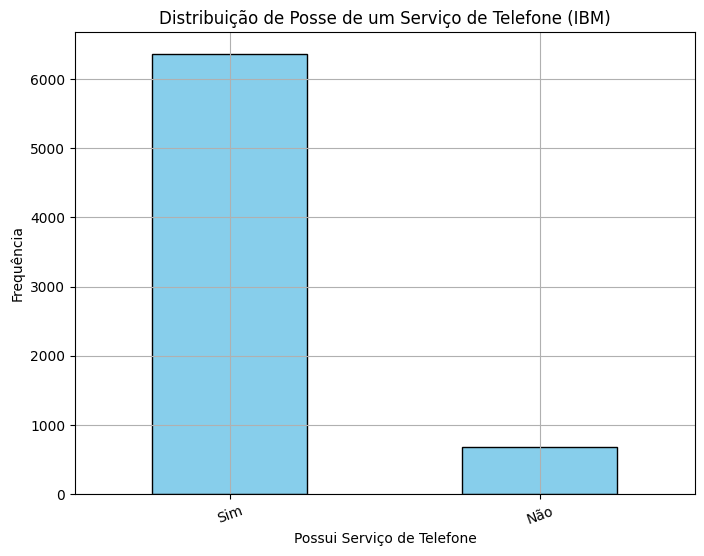

In [23]:
import matplotlib.pyplot as plt

phoneService_counts = df_IBM['PhoneService'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
phoneService_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Telefone (IBM)')
plt.xlabel('Possui Serviço de Telefone')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Sim', 'Não'])
plt.show()

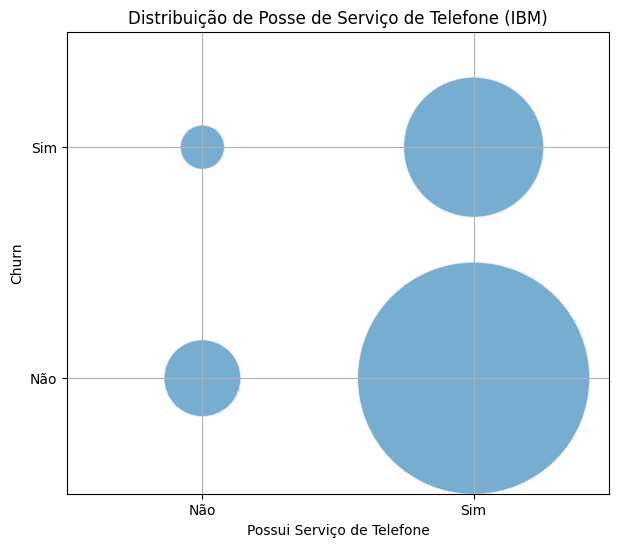

In [24]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
phoneService_churn_counts = df_IBM.groupby(['PhoneService', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=phoneService_churn_counts['PhoneService'], 
    y=phoneService_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=phoneService_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Serviço de Telefone (IBM)')
plt.xlabel('Possui Serviço de Telefone')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Possui Multiplas Linhas (MultipleLines) (Nominal)

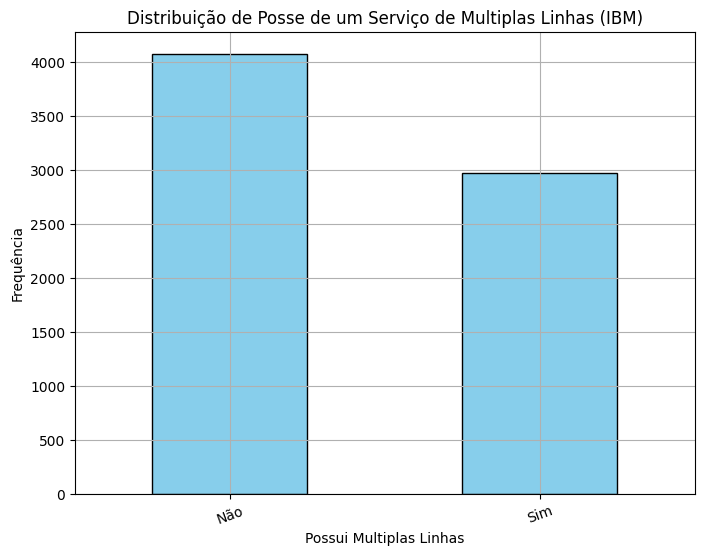

In [25]:
import matplotlib.pyplot as plt

multipleLines_counts = df_IBM['MultipleLines'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
multipleLines_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Multiplas Linhas (IBM)')
plt.xlabel('Possui Multiplas Linhas')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

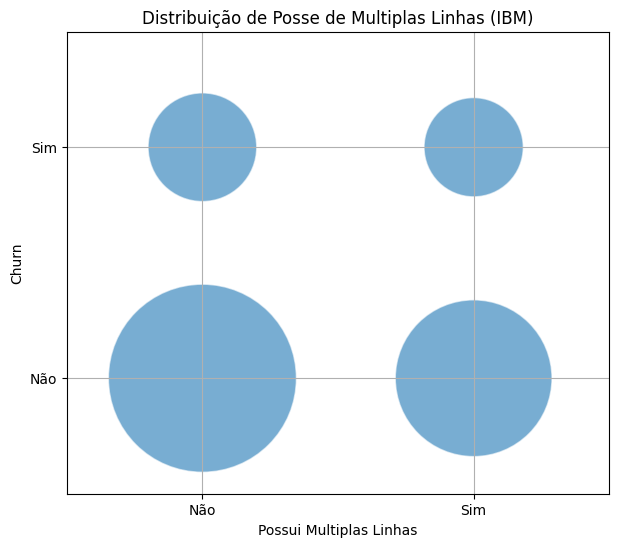

In [26]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
multipleLines_churn_counts = df_IBM.groupby(['MultipleLines', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=multipleLines_churn_counts['MultipleLines'], 
    y=multipleLines_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=multipleLines_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Multiplas Linhas (IBM)')
plt.xlabel('Possui Multiplas Linhas')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Posse de um Serviço de Segurança Online (OnlineSecurity) (Nominal)

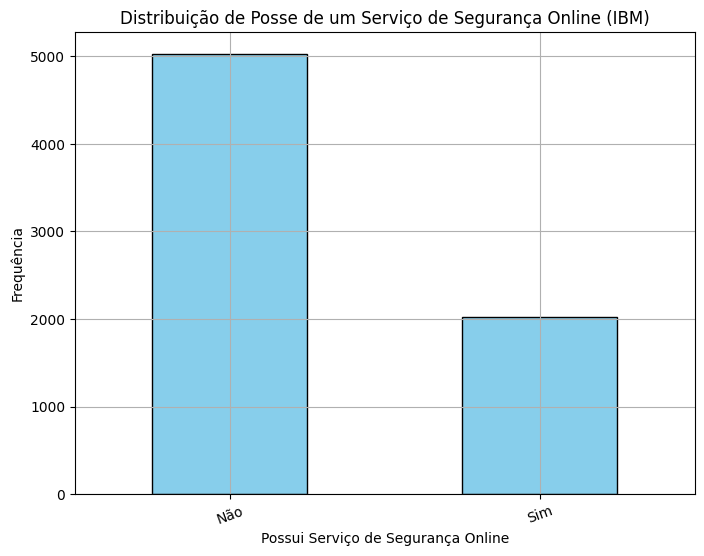

In [27]:
import matplotlib.pyplot as plt

onlineSecurity_counts = df_IBM['OnlineSecurity'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
onlineSecurity_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Segurança Online (IBM)')
plt.xlabel('Possui Serviço de Segurança Online')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

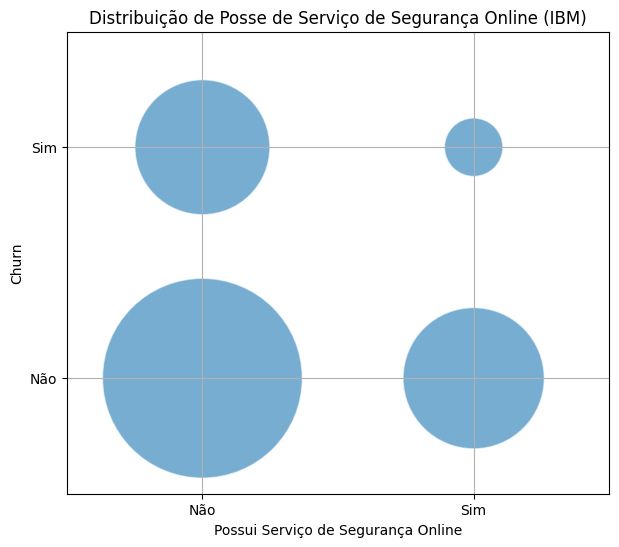

In [28]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
onlineSecurity_churn_counts = df_IBM.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=onlineSecurity_churn_counts['OnlineSecurity'], 
    y=onlineSecurity_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=onlineSecurity_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Serviço de Segurança Online (IBM)')
plt.xlabel('Possui Serviço de Segurança Online')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Posse de um Serviço de Backup Online (OnlineBackup) (Nominal)

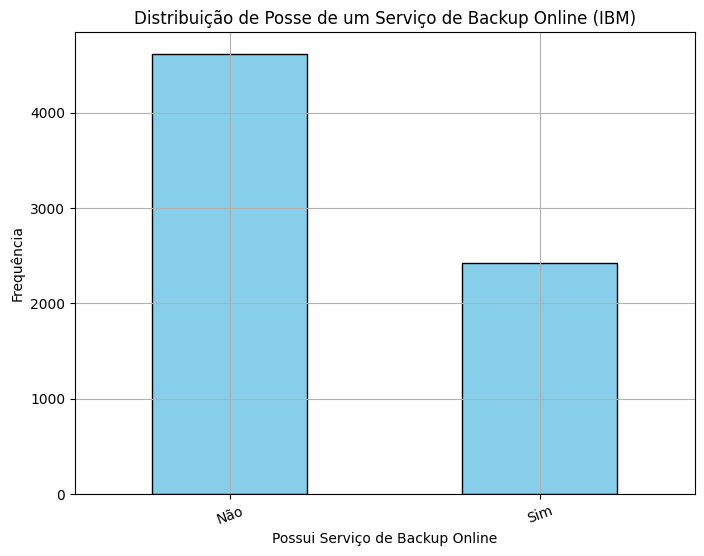

In [29]:
import matplotlib.pyplot as plt

onlineBackup_counts = df_IBM['OnlineBackup'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
onlineBackup_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Backup Online (IBM)')
plt.xlabel('Possui Serviço de Backup Online')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

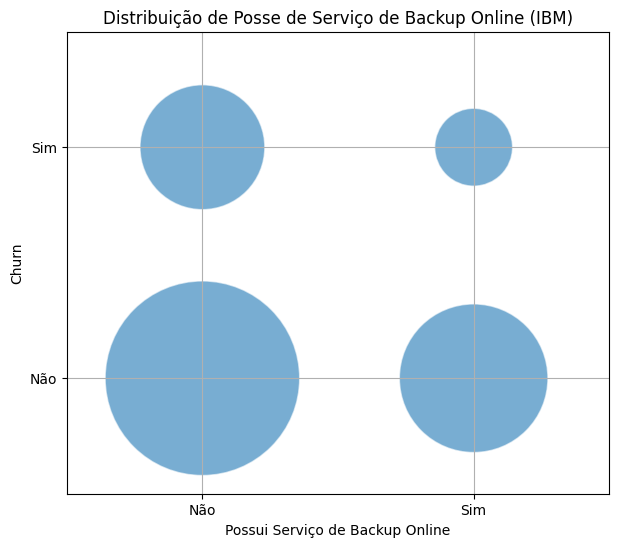

In [30]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
onlineBackup_churn_counts = df_IBM.groupby(['OnlineBackup', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=onlineBackup_churn_counts['OnlineBackup'], 
    y=onlineBackup_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=onlineBackup_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Serviço de Backup Online (IBM)')
plt.xlabel('Possui Serviço de Backup Online')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Posse de um Serviço de Proteção do Dispositivo (DeviceProtection) (Nominal)

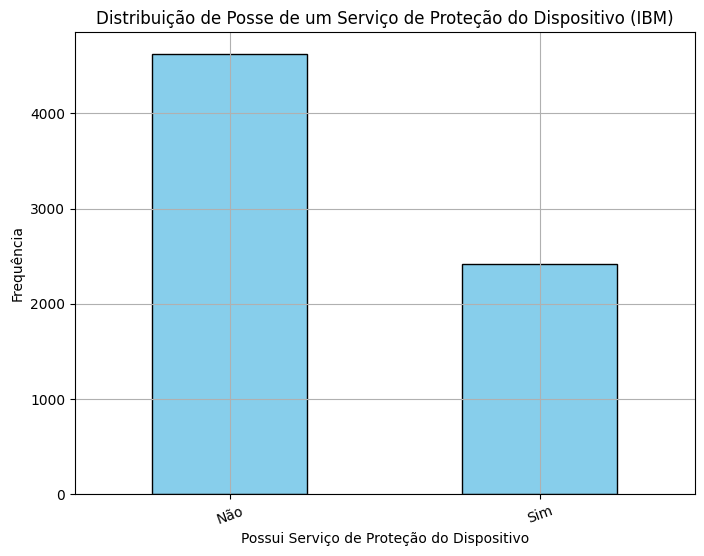

In [31]:
import matplotlib.pyplot as plt

deviceProtection_counts = df_IBM['DeviceProtection'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
deviceProtection_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Proteção do Dispositivo (IBM)')
plt.xlabel('Possui Serviço de Proteção do Dispositivo')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

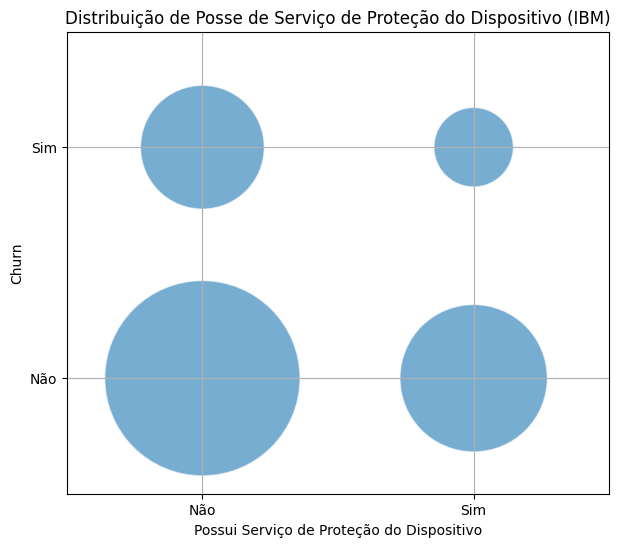

In [32]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
deviceProtection_churn_counts = df_IBM.groupby(['DeviceProtection', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=deviceProtection_churn_counts['DeviceProtection'], 
    y=deviceProtection_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=deviceProtection_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Serviço de Proteção do Dispositivo (IBM)')
plt.xlabel('Possui Serviço de Proteção do Dispositivo')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Serviço de Canais Televisivos (StreamingTV) (Nominal)

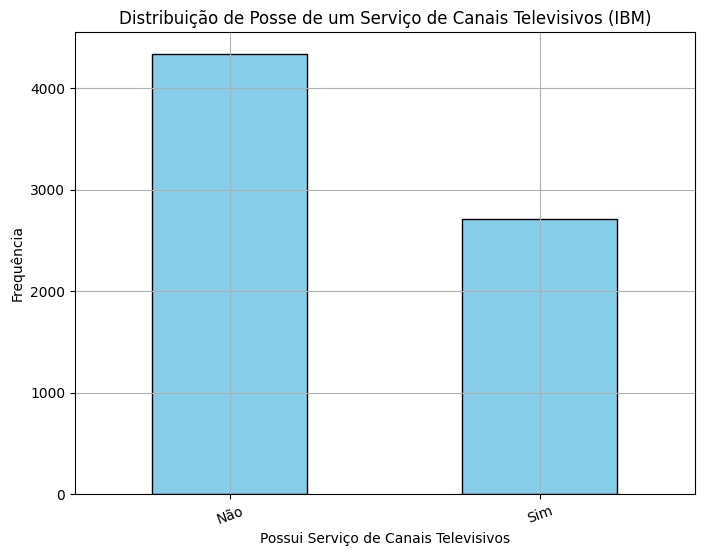

In [33]:
import matplotlib.pyplot as plt

streamingTV_counts = df_IBM['StreamingTV'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
streamingTV_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Canais Televisivos (IBM)')
plt.xlabel('Possui Serviço de Canais Televisivos')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

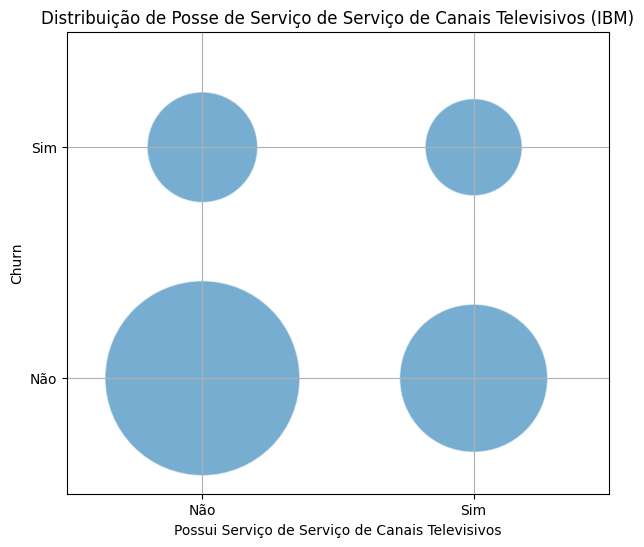

In [34]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
streamingTV_churn_counts = df_IBM.groupby(['StreamingTV', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=streamingTV_churn_counts['StreamingTV'], 
    y=streamingTV_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=streamingTV_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Serviço de Serviço de Canais Televisivos (IBM)')
plt.xlabel('Possui Serviço de Serviço de Canais Televisivos')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Posse de um Serviço de Transmissão de Filmes (StreamingMovies) (Nominal)

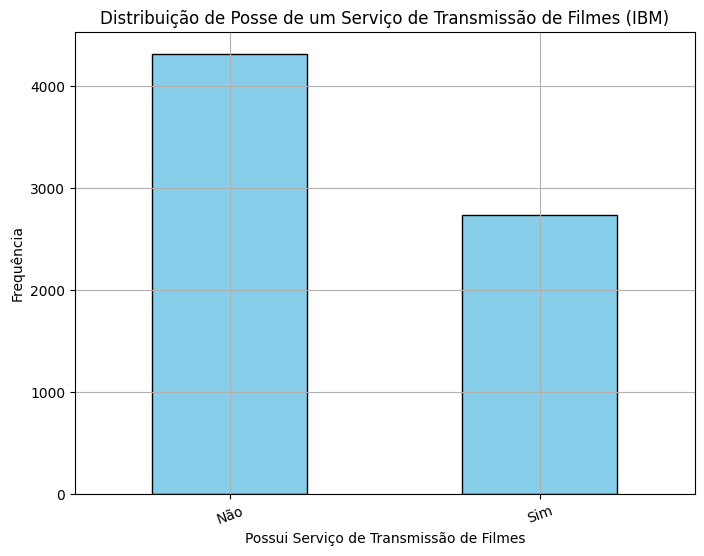

In [35]:
import matplotlib.pyplot as plt

streamingMovies_counts = df_IBM['StreamingMovies'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
streamingMovies_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Posse de um Serviço de Transmissão de Filmes (IBM)')
plt.xlabel('Possui Serviço de Transmissão de Filmes')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

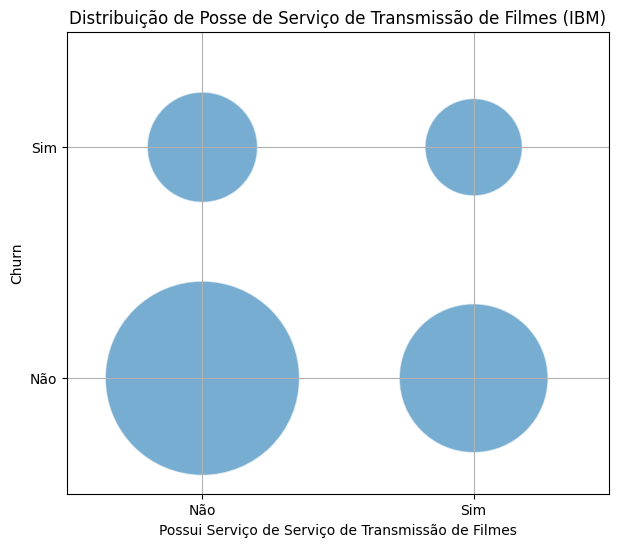

In [36]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
streamingMovies_churn_counts = df_IBM.groupby(['StreamingMovies', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=streamingMovies_churn_counts['StreamingMovies'], 
    y=streamingMovies_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=streamingMovies_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Posse de Serviço de Transmissão de Filmes (IBM)')
plt.xlabel('Possui Serviço de Serviço de Transmissão de Filmes')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Cobrança Sem Papeis (PaperlessBilling) (Nominal)

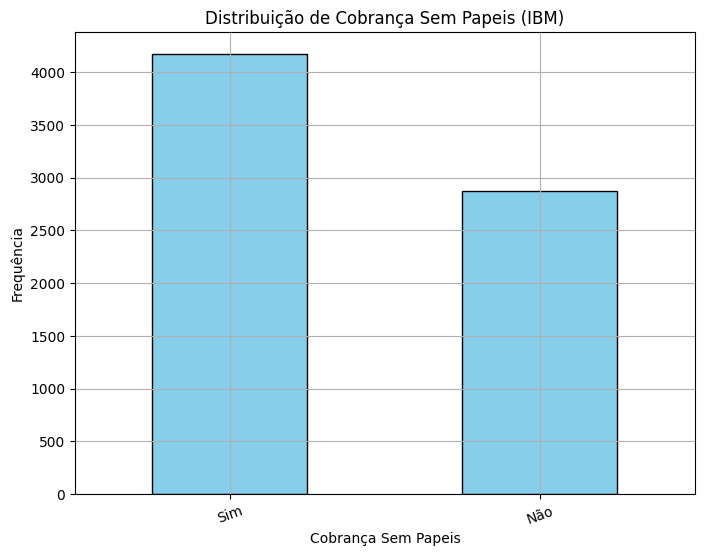

In [37]:
import matplotlib.pyplot as plt

paperlessBilling_counts = df_IBM['PaperlessBilling'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
paperlessBilling_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Cobrança Sem Papeis (IBM)')
plt.xlabel('Cobrança Sem Papeis')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.xticks([0, 1], ['Sim', 'Não'])
plt.show()

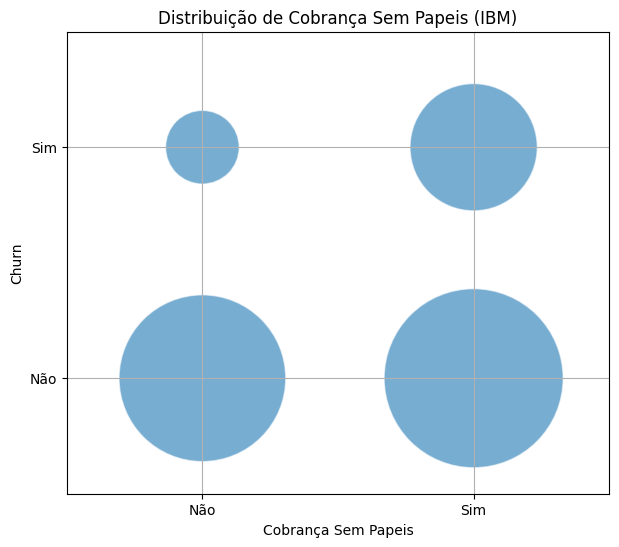

In [38]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
paperlessBilling_churn_counts = df_IBM.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(7, 6))
plt.scatter(
    x=paperlessBilling_churn_counts['PaperlessBilling'], 
    y=paperlessBilling_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=paperlessBilling_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.5, 1.5)
plt.title('Distribuição de Cobrança Sem Papeis (IBM)')
plt.xlabel('Cobrança Sem Papeis')
plt.ylabel('Churn')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

## Estudo da Coluna de Tipo de Pagamento (PaymentMethod) (Nominal)

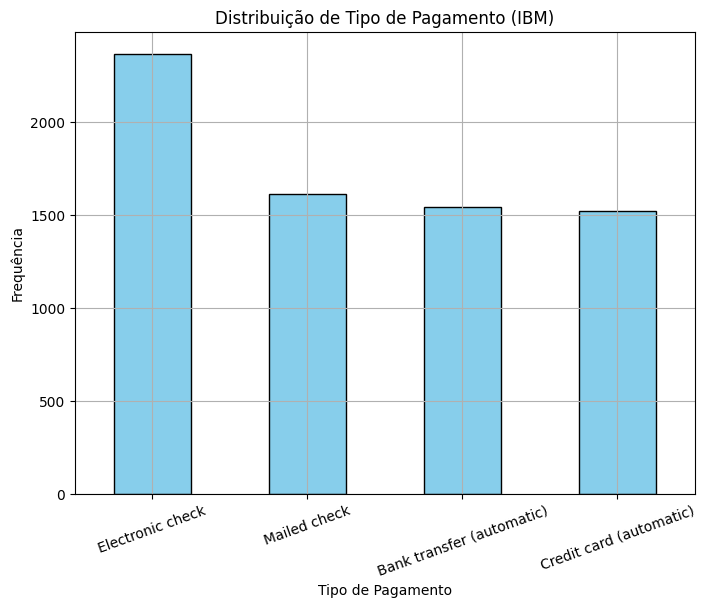

In [39]:
import matplotlib.pyplot as plt

paymentMethod_counts = df_IBM['PaymentMethod'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
paymentMethod_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.grid(True)
plt.title('Distribuição de Tipo de Pagamento (IBM)')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Frequência')
plt.xticks(rotation=20)
plt.show()

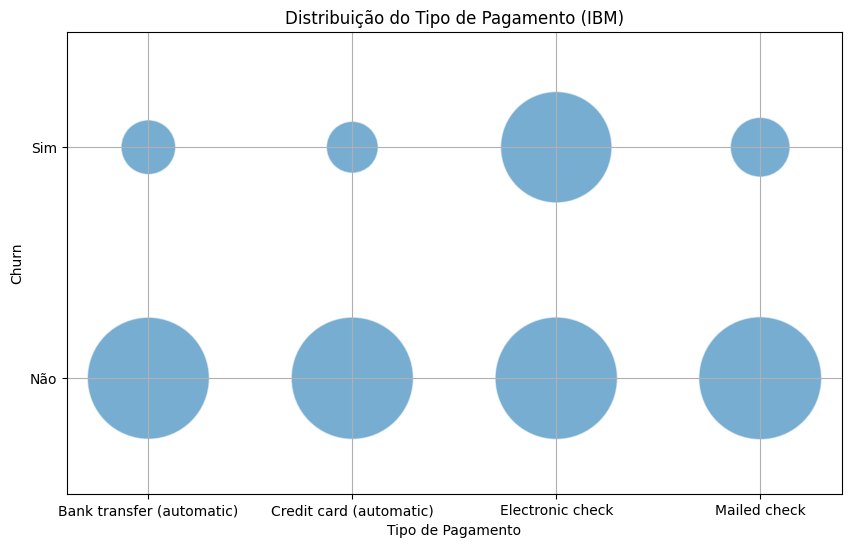

In [40]:
# nominal x nominal
import matplotlib.pyplot as plt
# Contar as ocorrências de Suporte Técnico e Churn
paymentMethod_churn_counts = df_IBM.groupby(['PaymentMethod', 'Churn']).size().reset_index(name='Count')
# Criar o gráfico de bolha
plt.figure(figsize=(10, 6))
plt.scatter(
    x=paymentMethod_churn_counts['PaymentMethod'], 
    y=paymentMethod_churn_counts['Churn'].map({'No': 0, 'Yes': 1}),
    s=paymentMethod_churn_counts['Count'] * 6,
    alpha=0.6,
    edgecolors='w',
)
plt.ylim(-0.5, 1.5)
plt.xlim(-0.4, 3.4)
plt.title('Distribuição do Tipo de Pagamento (IBM)')
plt.xlabel('Tipo de Pagamento')
plt.ylabel('Churn')
plt.yticks([0, 1], ['Não', 'Sim'])
plt.grid(True)
plt.show()

# Conversão de Atributos Categóricos para Numéricos (One-Hot Encoding)

In [41]:
import pandas as pd

# Tornar em binário os valores categoricos através do one-hot encoding
df_IBM = pd.get_dummies(df_IBM, columns=['Contract', 'InternetService', 'PaymentMethod'], drop_first=False, dtype=int)
df_IBM = pd.get_dummies(df_IBM, columns=["gender", "TechSupport", "Churn", "Partner", "Dependents", "PhoneService", "MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "StreamingTV", "StreamingMovies", "PaperlessBilling"], drop_first=True, dtype=int)

# Seleção de Atributos

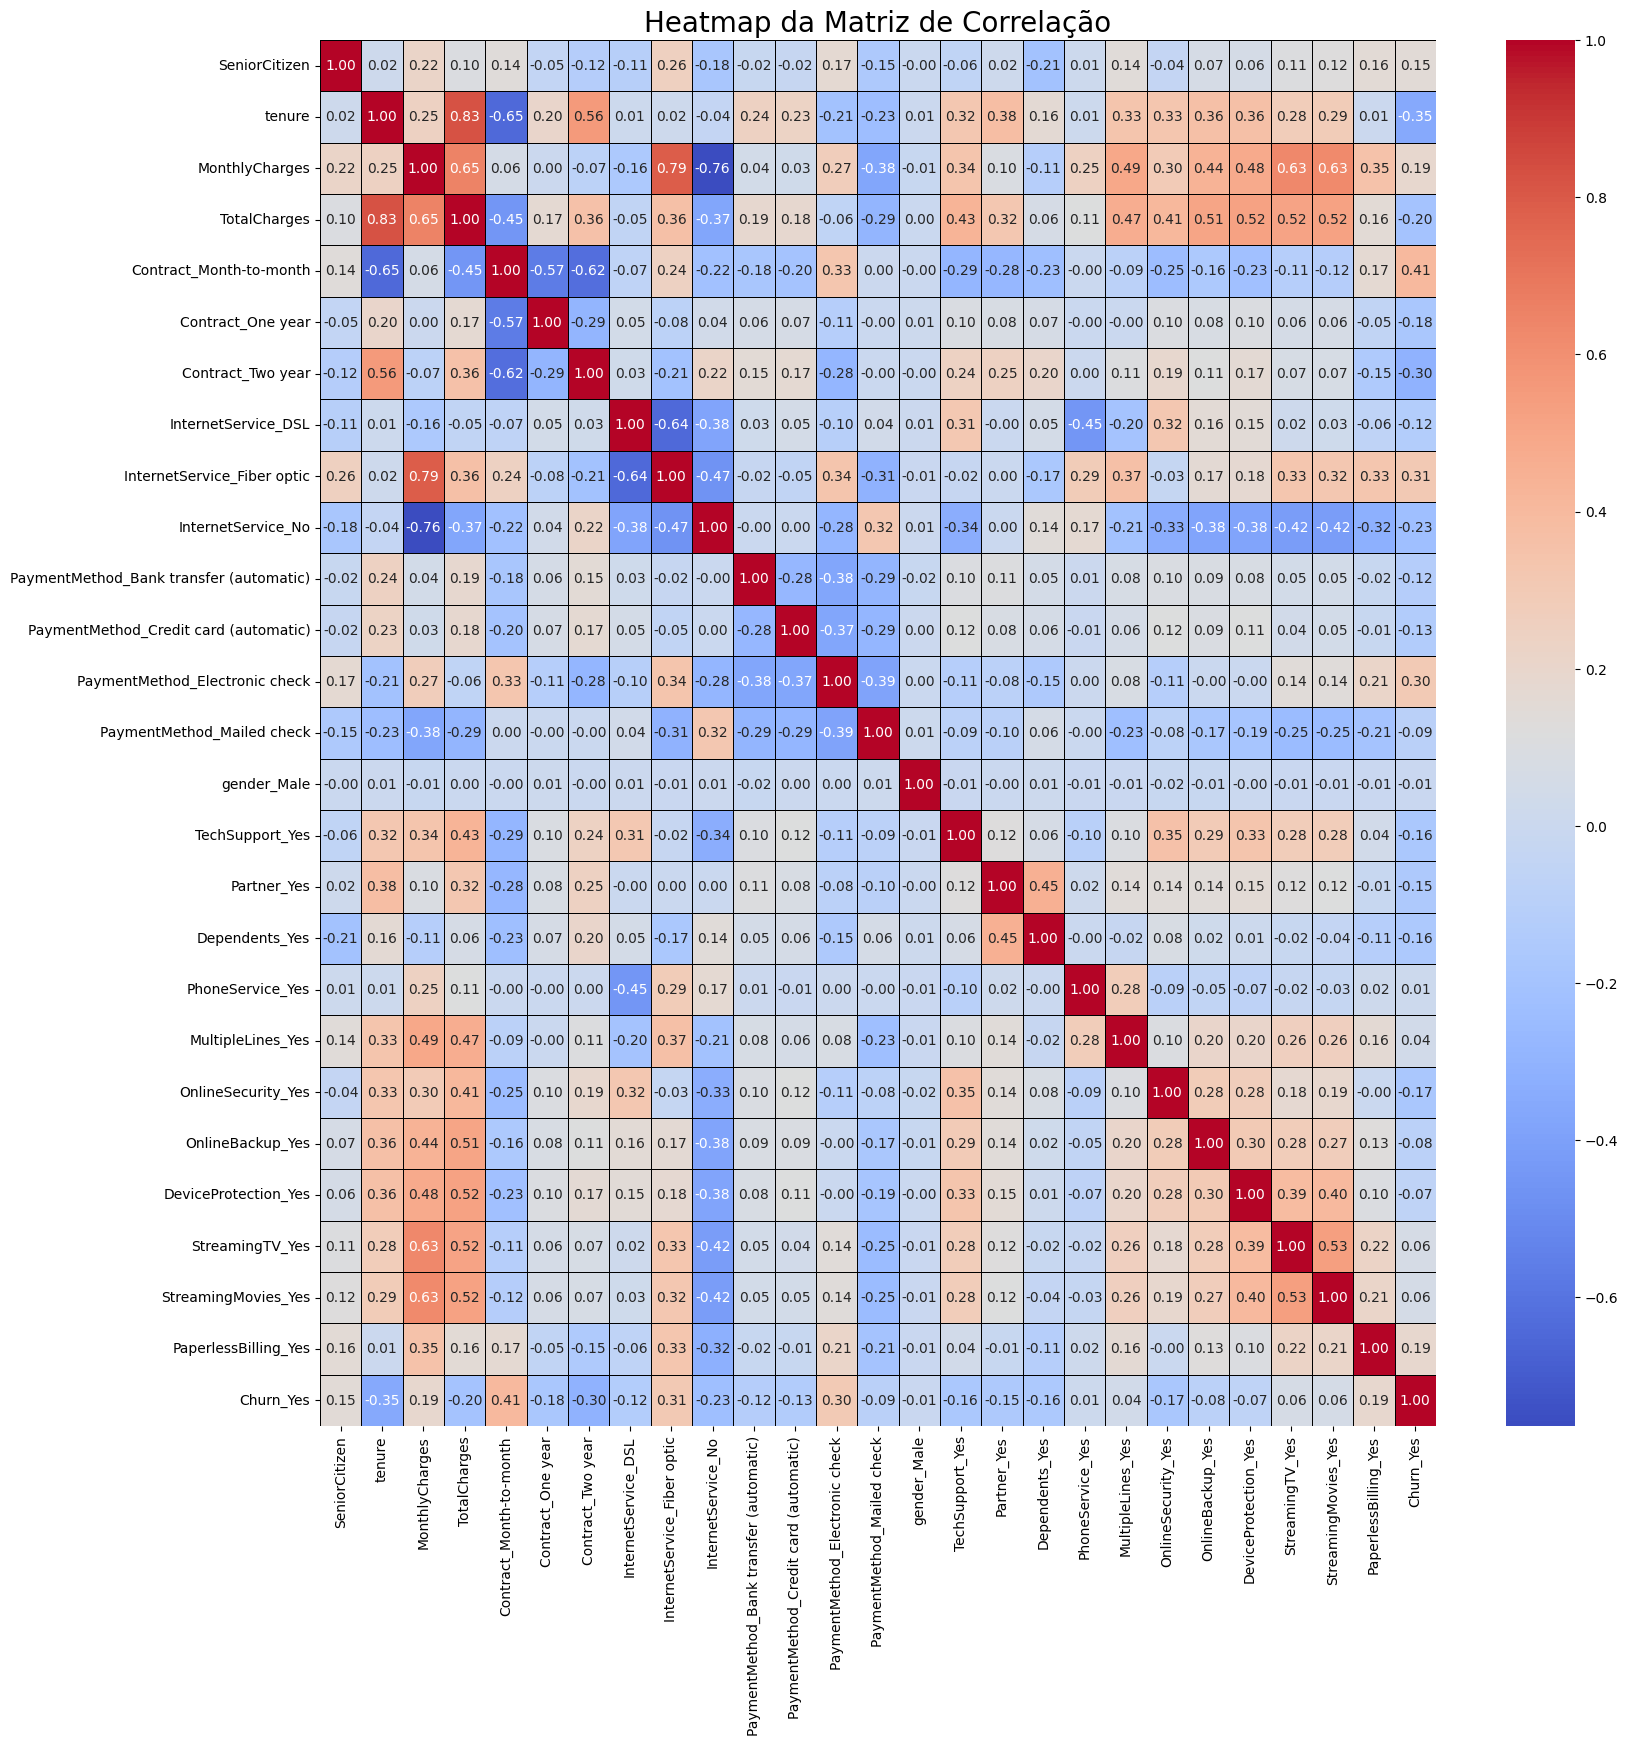

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular a matriz de correlação
correlation_matrix = df_IBM.corr()

# Mover o atributo 'Churn_Yes' para o final
cols = [col for col in correlation_matrix.columns if col != 'Churn_Yes']
cols.append('Churn_Yes')

# Reordenar a matriz de correlação
correlation_matrix = correlation_matrix[cols].T[cols]

# Criar o heatmap com a nova ordem de atributos
plt.figure(figsize=(18, 18))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5, 
    linecolor='black'
)

# Adicionar título
plt.title("Heatmap da Matriz de Correlação", fontsize=20)
plt.show()


In [43]:
#remover atributos com correlacao absoluta com o Churn_Yes <= 15
df_IBM = df_IBM.drop('StreamingMovies_Yes', axis=1)
df_IBM = df_IBM.drop('StreamingTV_Yes', axis=1)
df_IBM = df_IBM.drop('DeviceProtection_Yes', axis=1)
df_IBM = df_IBM.drop('OnlineBackup_Yes', axis=1)
df_IBM = df_IBM.drop('MultipleLines_Yes', axis=1)
df_IBM = df_IBM.drop('PhoneService_Yes', axis=1)
df_IBM = df_IBM.drop('gender_Male', axis=1)
df_IBM = df_IBM.drop('Partner_Yes', axis=1)
df_IBM = df_IBM.drop('SeniorCitizen', axis=1)

#remover atributos correlacionados
df_IBM = df_IBM.drop('TotalCharges', axis=1)

# Normalização

In [44]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = ['tenure', 'MonthlyCharges']
scaler = StandardScaler()

# Normalizar colunas numéricas
df_IBM[columns_to_normalize] = scaler.fit_transform(df_IBM[columns_to_normalize])

#Preparação dos dados no formato de treino
X = df_IBM.drop(columns=['Churn_Yes'])
y = df_IBM['Churn_Yes']


# Balanceamento

In [45]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import numpy as np

num_registros = len(y)
print(f"Número total de registros: {num_registros}")
proporcoes = y.value_counts(normalize=True) * 100
print(proporcoes)


#Balanceamento
smote = SMOTE(sampling_strategy='auto', random_state=42)
tomek = TomekLinks(sampling_strategy='majority')
X, y = smote.fit_resample(X, y)
X, y = tomek.fit_resample(X, y)


num_registros = len(y)
print(f"Número total de registros: {num_registros}")
proporcoes = y.value_counts(normalize=True) * 100
print(proporcoes)

Número total de registros: 7043
Churn_Yes
0    73.463013
1    26.536987
Name: proportion, dtype: float64
Número total de registros: 9883
Churn_Yes
1    52.352525
0    47.647475
Name: proportion, dtype: float64


# Treino e Avaliação

In [46]:
from sklearn.model_selection import KFold, cross_validate
import numpy as np

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Configurar a validação cruzada
cv = KFold(n_splits=10, shuffle=True, random_state=42)
# Modelos de Classificação
classifiers = {
    "RF": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42, probability=True),
    "XGBoost": XGBClassifier(random_state=42, n_estimators=200, max_depth=10, learning_rate=1, objective='binary:logistic'),
    "DT": DecisionTreeClassifier(random_state=42),
    "LR": LogisticRegression(random_state=42, max_iter=1000),
    "NB": GaussianNB()
}

# Resultados
results = {}

# Avaliar Classificação com validação cruzada
for name, model in classifiers.items():
    cv_results = cross_validate(model, X, y, cv=cv,
                                scoring=['accuracy', 'precision', 'f1_weighted', 'roc_auc', 'recall'],
                                return_train_score=False)
    
    results[name] = {
        "Precision Mean": np.mean(cv_results['test_precision']),
        "Precision Std": np.std(cv_results['test_precision']),
        "Accuracy Mean": np.mean(cv_results['test_accuracy']),
        "Accuracy Std": np.std(cv_results['test_accuracy']),
        "Recall Mean": np.mean(cv_results['test_recall']),
        "Recall Std": np.std(cv_results['test_recall']),
        "F1 Score Mean": np.mean(cv_results['test_f1_weighted']),
        "F1 Score Std": np.std(cv_results['test_f1_weighted']),
        "AUC Mean": np.mean(cv_results['test_roc_auc']),
        "AUC Std": np.std(cv_results['test_roc_auc']),
        
    }

# Converter os resultados num DataFrame
results_df = pd.DataFrame(results).T  # Transpor para ter os modelos como linhas
results_df = results_df.round(4)


In [47]:
# Exibir tabela de resultados
print("\nResultados:")
print(results_df.round(4))


Resultados:
         Precision Mean  Precision Std  Accuracy Mean  Accuracy Std  \
RF               0.8514         0.0143         0.8600        0.0119   
SVM              0.7487         0.0125         0.7722        0.0065   
XGBoost          0.8265         0.0158         0.8332        0.0126   
DT               0.8082         0.0240         0.8017        0.0184   
LR               0.7836         0.0119         0.7916        0.0085   
NB               0.7701         0.0116         0.7789        0.0078   

         Recall Mean  Recall Std  F1 Score Mean  F1 Score Std  AUC Mean  \
RF            0.8876      0.0173         0.8597        0.0119    0.9311   
SVM           0.8505      0.0163         0.7702        0.0065    0.8667   
XGBoost       0.8626      0.0185         0.8330        0.0126    0.9096   
DT            0.8144      0.0197         0.8016        0.0184    0.8035   
LR            0.8316      0.0134         0.7910        0.0086    0.8714   
NB            0.8239      0.0187       

## Representação Gráfica dos Resultados

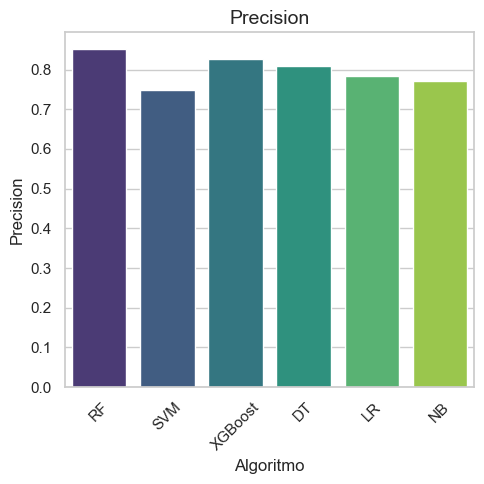

In [48]:
# Gráfico para a métrica Precision
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x=results_df.index, y=results_df["Precision Mean"], palette="viridis", dodge=False, hue=results_df.index, legend=False)
plt.title("Precision", fontsize=14)
plt.ylabel("Precision", fontsize=12)
plt.xlabel("Algoritmo", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

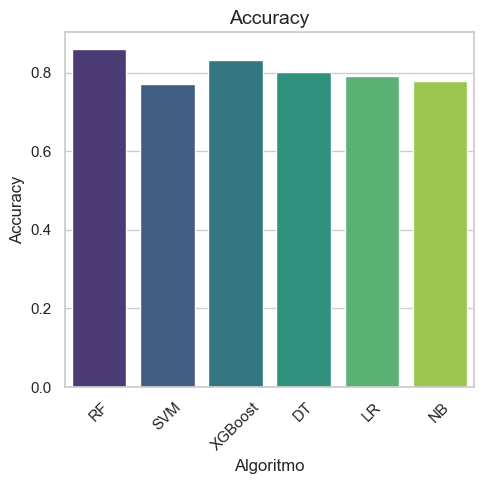

In [49]:
# Gráfico para a métrica Accuracy
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x=results_df.index, y=results_df["Accuracy Mean"], palette="viridis", dodge=False, hue=results_df.index, legend=False)
plt.title("Accuracy", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Algoritmo", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

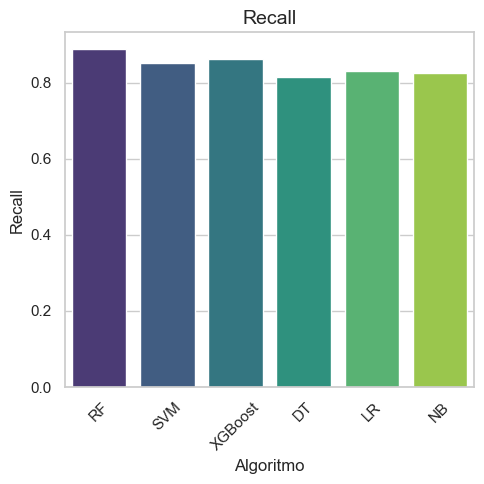

In [50]:
# Gráfico para a métrica Recall
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x=results_df.index, y=results_df["Recall Mean"], palette="viridis", dodge=False, hue=results_df.index, legend=False)
plt.title("Recall", fontsize=14)
plt.ylabel("Recall", fontsize=12)
plt.xlabel("Algoritmo", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

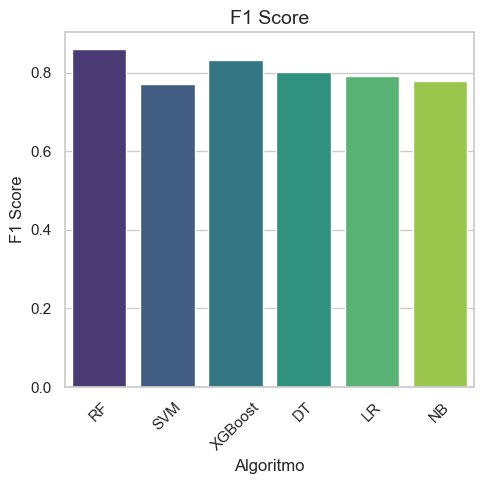

In [51]:
# Gráfico para a métrica F1 Score
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x=results_df.index, y=results_df["F1 Score Mean"], palette="viridis", dodge=False, hue=results_df.index, legend=False)
plt.title("F1 Score", fontsize=14)
plt.ylabel("F1 Score", fontsize=12)
plt.xlabel("Algoritmo", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

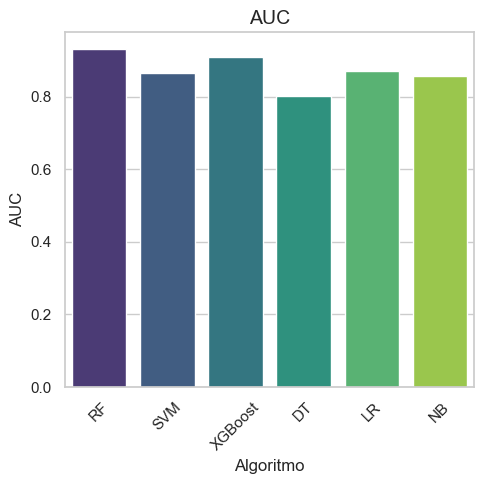

In [52]:
# Gráfico para a métrica AUC
plt.figure(figsize=(5, 5))
sns.set(style="whitegrid")
sns.barplot(x=results_df.index, y=results_df["AUC Mean"], palette="viridis", dodge=False, hue=results_df.index, legend=False)
plt.title("AUC", fontsize=14)
plt.ylabel("AUC", fontsize=12)
plt.xlabel("Algoritmo", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature Importance

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


feature_names  = ["tenure", 
                  "MonthlyCharges", 
                  "Contract_Month-to-month", 
                  "Contract_One year", 
                  "Contract_Two year",
                  "InternetService_DSL",
                  "InternetService_Fiber optic",
                  "InternetService_No",
                  "PaymentMethod_Bank transfer (automatic)",
                  "PaymentMethod_Credit card (automatic)",
                  "PaymentMethod_Electronic check",
                  "PaymentMethod_Mailed check",
                  "TechSupport_Yes",
                  "Dependents_Yes",
                  "OnlineSecurity_Yes",
                  "PaperlessBilling_Yes"
                 ]


# Modelos de Classificação baseados em arvores
classifiers = {
    "RF": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42, probability=True),
    "XGBoost": XGBClassifier(random_state=42, n_estimators=200, max_depth=10, learning_rate=1, objective='binary:logistic'),
    "DT": DecisionTreeClassifier(random_state=42),
    "LR": LogisticRegression(random_state=42, max_iter=1000),
}

# importância das features
feature_importance = {}

for name, model in classifiers.items():
    model.fit(X, y)  # Treinar o modelo
    
    if hasattr(model, "feature_importances_"):  # Só Modelos de árvore
        feature_importance[name] = model.feature_importances_
    
    elif hasattr(model, "coef_"):  # Só Modelos lineares
        feature_importance[name] = np.abs(model.coef_).flatten()
    
# Criar DataFrame com a importância das features
feature_importance_df = pd.DataFrame(feature_importance, index=feature_names)  # feature_names deve conter os nomes das features
feature_importance_df = feature_importance_df.round(4)

## Resultados

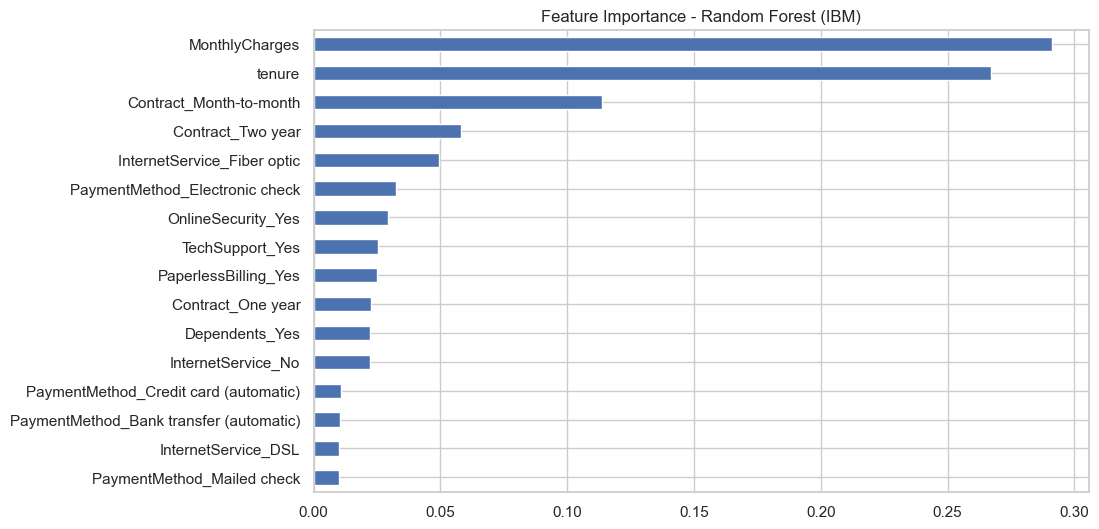

In [54]:
plt.figure(figsize=(10, 6))
feature_importance_df["RF"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance - Random Forest (IBM)")
plt.show()

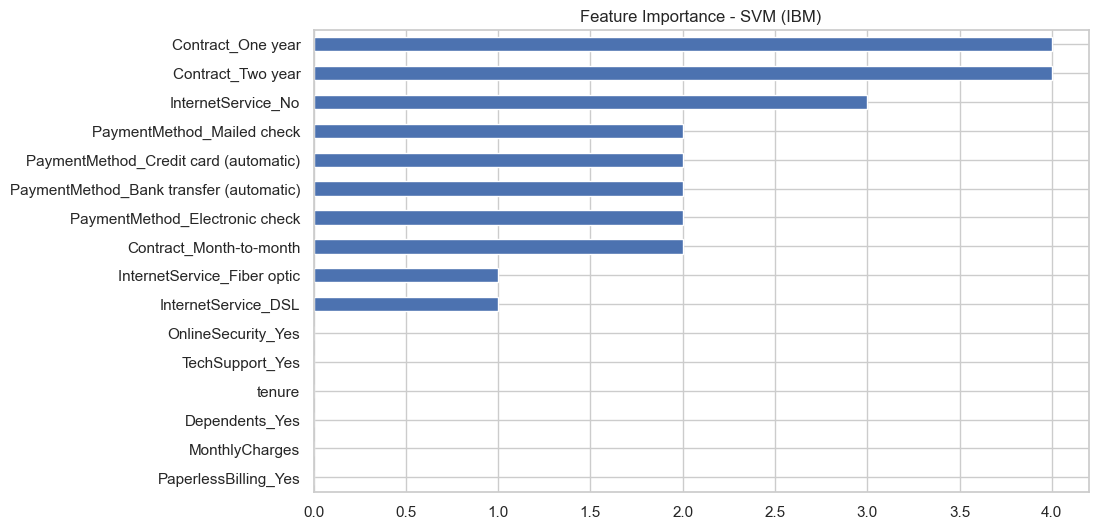

In [55]:
plt.figure(figsize=(10, 6))
feature_importance_df["SVM"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance - SVM (IBM)")
plt.show()

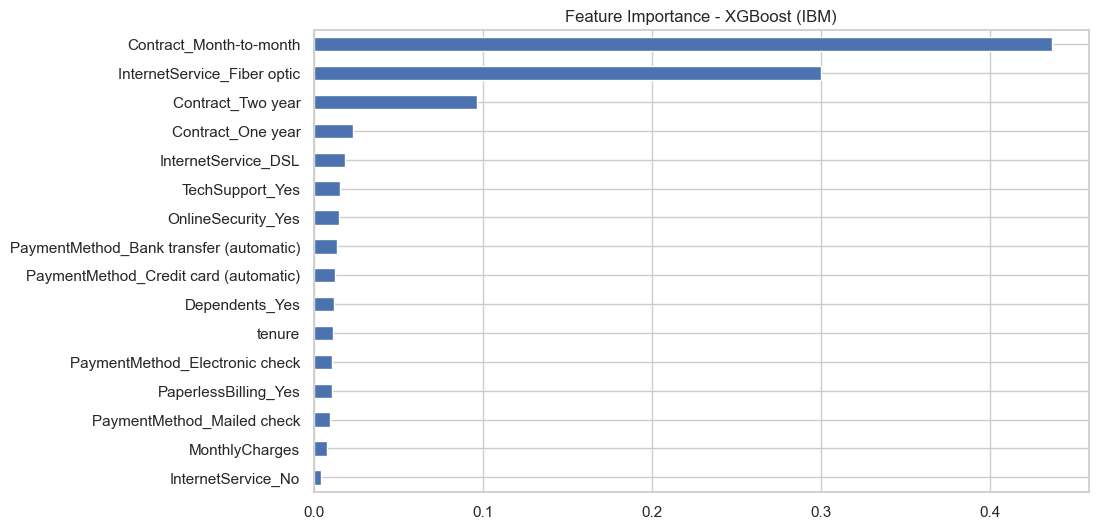

In [56]:
plt.figure(figsize=(10, 6))
feature_importance_df["XGBoost"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance - XGBoost (IBM)")
plt.show()

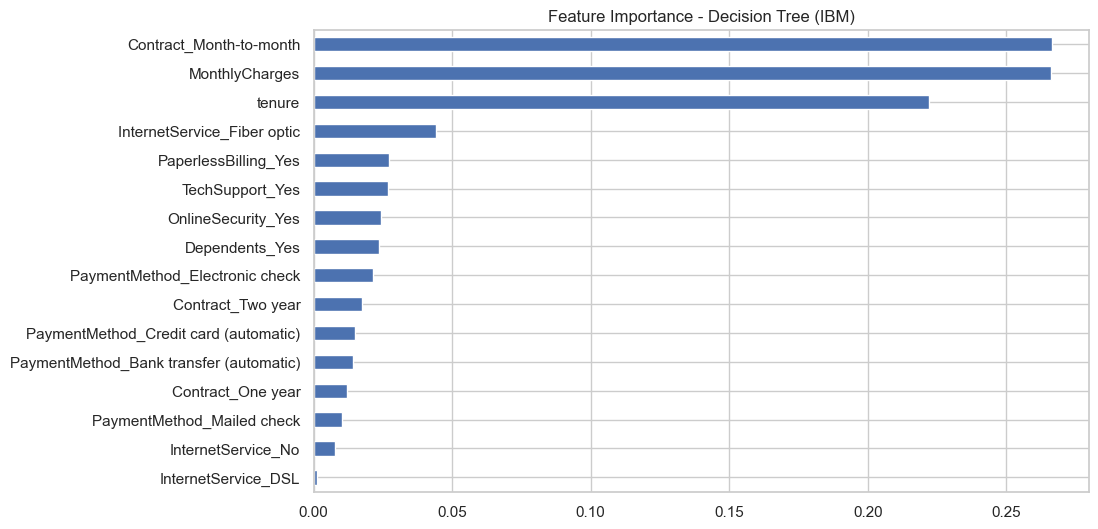

In [57]:
plt.figure(figsize=(10, 6))
feature_importance_df["DT"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance - Decision Tree (IBM)")
plt.show()

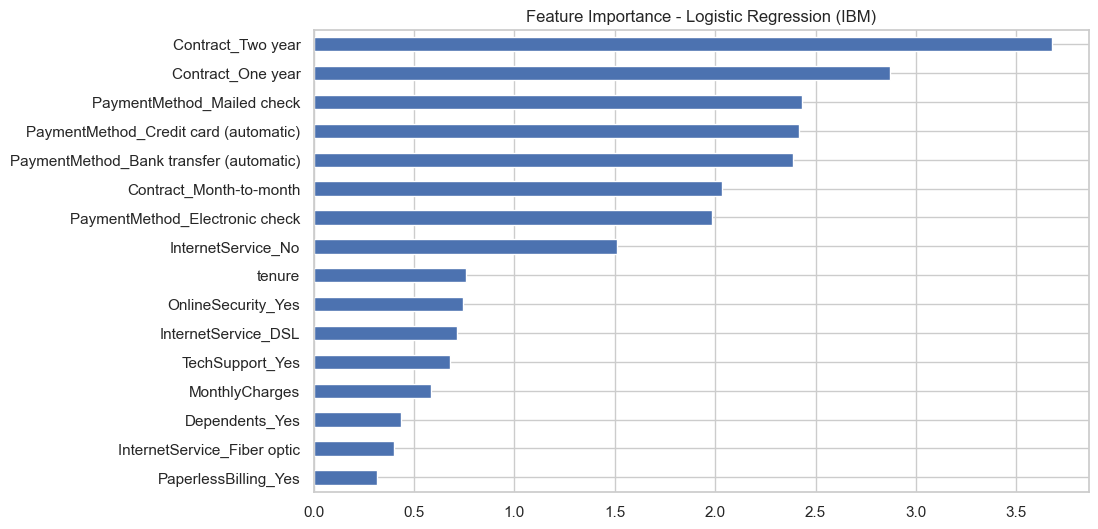

In [58]:
plt.figure(figsize=(10, 6))
feature_importance_df["LR"].sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importance - Logistic Regression (IBM)")
plt.show()